In [14]:
# Required Packages
import pandas as pd
import numpy as np
import json

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### Table of Contents

* [Los Angeles County Restaurant and Market Violations and Inspections](#Los-Angeles-County-Restaurant-and-Market-Violations-and-Inspections)
* [Loading Datasets](#Loading-Datasets)
    * [Violations Dataset](#Violations-Dataset)
    * [Inspection Result Dataset](#Inspection-Result-Dataset)
    * [Merged Dataset](#Merged-Dataset)
* [Initial Analysis](#Initial-Analysis)
    * [Dates with the most Number of Violations](#Dates-with-the-most-Number-of-Violations)
    * [Restaurant Owners with the most number of Violations](#Restaurant-Owners-with-the-most-number-of-Violations)
    * [Facilities with the Most Violations](#Facilities-with-the-Most-Violations)
    * [Programs with the Most Violations](#Programs-with-the-Most-Violations)
    * [Cities with the Most Violations](#Cities-with-the-Most-Violations)
    * [Service Description](#Service-Description)
    * [The Number of Violations by High-Score and Low-Score Facilities](#The-Number-of-Violations-by-High-Score-and-Low-Score-Facilities)
    * [The Number of Violations by Each Grades](#The-Number-of-Violations-by-Each-Grades)
    * [Violation Status](#Violation-Status)
    * [The Most Described Violations](#The-Most-Described-Violations)
    * [Program Element Description](#Program-Element-Description)
    * [A Deeper look into Violation by each Facility](#A-Deeper-look-into-Violation-by-each-Facility)

# Los Angeles County Restaurant and Market Violations and Inspections


In this article, we use a dataset contains Environmental Health Violations for Restaurants and Markets in Los Angeles County. This dataset can be found [here](https://data.lacounty.gov/Health/LOS-ANGELES-COUNTY-RESTAURANT-AND-MARKET-VIOLATION/8jyd-4pv9) and [here](https://data.lacounty.gov/Health/LOS-ANGELES-COUNTY-RESTAURANT-AND-MARKET-INSPECTIO/6ni6-h5kp).

Los Angeles County Environmental Health is responsible for checking food violations for all unincorporated areas and 85 of the 88 cities in the County. This dataset does not include Pasadena, Long Beach or Vernon (each has its own city health department).

# Loading Datasets

The data that has been processed before.

In [15]:
Violations_df = pd.read_csv('Data/Clean_Violations_df.csv')
Inspections_df = pd.read_csv('Data/Clean_Inspections_df.csv')
Data  = pd.read_csv('Data/Data_Inspections_Violations_df.csv')
Violation_Dictionary_df  = pd.read_csv('Data/Violation_Dictionary_df.csv')

## Violations Dataset

Each row represents one health code violation. All rows with the same Serial Number are part of the same inspection. The Serial Number is the primary key to review the inspection grade (Inspection Result dataset)

In [16]:
Violations_df.head().style.hide_index()

## Inspection Result Dataset

Each row represents one inspection result. The Serial Number is the primary key to access/review the violations (Violations Dataset) associated with a particular inspection.

In [17]:
Inspections_df.head().style.hide_index()

## Merged Dataset

In [18]:
Data.head().style.hide_index()

# Initial Analysis

First off, note that our dataset has the following columns.

In [19]:
Data.columns

Index(['Activity Date', 'Owner ID', 'Owner Name', 'Facility ID',
       'Facility Name', 'Record ID', 'Program Name', 'Program Status',
       'Program Element (PE)', 'Facility Address', 'Facility City',
       'Facility State', 'Facility Zip', 'Service Code', 'Service Description',
       'Score', 'Grade', 'Serial Number', 'Employee ID', 'Location',
       'Violation Status', 'Violation Code', 'Violation Description', 'Points',
       'PE_Type', 'PE_Seats', 'PE_Risk'],
      dtype='object')

## Dates with the most Number of Violations

In [20]:
Activity=Data.groupby('Activity Date')['Violation Code'].agg({'Count': 'count'})
Activity[Activity['Count'] >2400 ].T

Activity Date  2018-01-16  2018-03-21  2018-07-17  2018-07-24  2018-07-25  \
Count                2467        2401        2560        2501        2406   

Activity Date  2018-08-08  2018-09-18  2018-09-25  2018-09-26  2018-10-03  \
Count                2497        2505        2605        2546        2653   

Activity Date  ...  2019-08-13  2019-08-14  2019-08-20  2019-08-21  \
Count          ...        2466        2489        2424        2589   

Activity Date  2019-08-27  2019-08-28  2019-09-10  2019-09-18  2019-09-24  \
Count                2643        2442        2487        2467        2728   

Activity Date  2019-09-25  
Count                2413  

[1 rows x 34 columns]

In [21]:
Activity[Activity['Count'] == Activity.max()[0]].index[0]

'2019-01-23'

We can see that the highest number of violations happened on **January 23, 2019**.

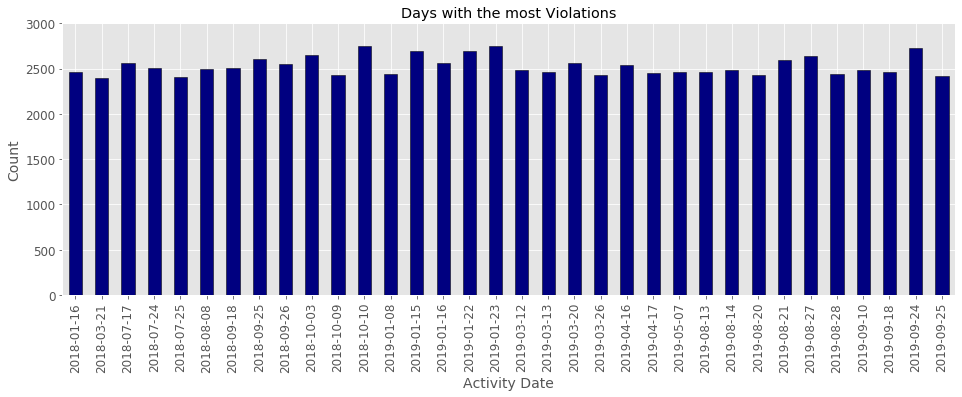

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), sharex=False)
_ = Activity[Activity['Count'] >2400 ].plot.bar(rot=90,ax=ax, legend=False,
                                                color=sns.light_palette('navy', reverse=True), edgecolor='k')
_ = ax.set_title('Days with the most Violations')
_ = ax.set_ylim([0, 3e3])
_ = ax.set_xlabel('Activity Date')
_ = ax.set_ylabel('Count')

In particular, for the hightest number of violations, we have

In [23]:
Activity_Violation  = Data.groupby(['Activity Date','Violation Code'])['Violation Code'].agg({'Count': 'count'})
list = Activity[Activity['Count'] == Activity['Count'].max()].index
temp = Activity_Violation.loc[list]
temp = temp.reset_index(drop=False).drop(columns ='Activity Date')
temp.T

0     1     2     3     4     5     6     7     8     9   \
Violation Code  F004  F005  F006  F007  F008  F009  F011  F013  F014  F016   
Count             11    11   115   105    15    27     1    13   114     5   

                ...    35    36    37    38    39    40    41    42    43  \
Violation Code  ...  F047  F048  F049  F050  F052  F053  F054  F055  F057   
Count           ...     4    23    33    14    35    41     7    21     2   

                  44  
Violation Code  F058  
Count              4  

[2 rows x 45 columns]

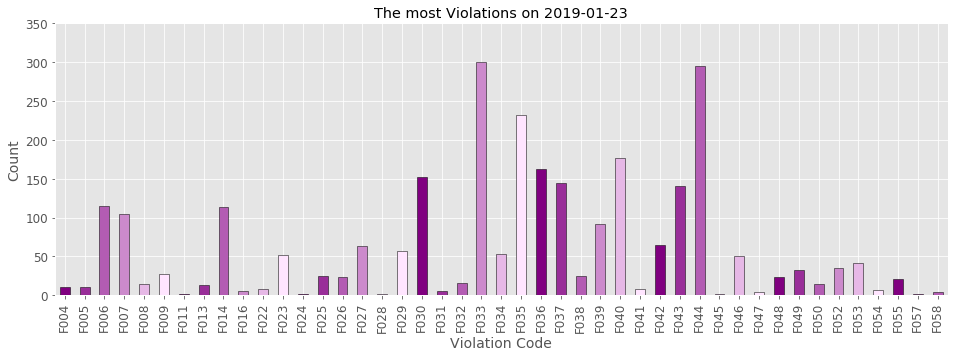

In [24]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), sharex=False)
_ = temp.plot.bar(rot=90,ax=ax, x='Violation Code', y='Count', legend=False,
                  color=sns.light_palette("purple", reverse=True), edgecolor="k")
_ = ax.set_title('The most Violations on %s' % list.tolist()[0])
_ = ax.set_ylim([0, 350])
_ = ax.set_xlabel('Violation Code')
_ = ax.set_ylabel('Count')

The most violations on this day are:

In [32]:
mylist=temp.sort_values('Count', ascending=False).head(3)['Violation Code'].tolist()
Violation_Dictionary_df.loc[Violation_Dictionary_df['Violation Code'].isin(mylist)].style.hide_index()

## Restaurant Owners with the most number of Violations

In [33]:
Owners=Data[Data['Owner ID'].isna()==False].groupby('Owner ID')['Violation Code'].agg({'Count': 'count'})
Owners=Owners.sort_values(by='Count', ascending=False)
Owners[Owners['Count'] >1.5e3].T

Owner ID  OW0029458  OW0038181  OW0033938  OW0010868  OW0012108  OW0033717  \
Count          6950       5116       3272       2701       2375       2114   

Owner ID  OW0007608  OW0004937  OW0027458  OW0034460  OW0038850  OW0012926  \
Count          2036       2034       1981       1969       1817       1750   

Owner ID  OW0021606  OW0009661  OW0002029  
Count          1626       1573       1504

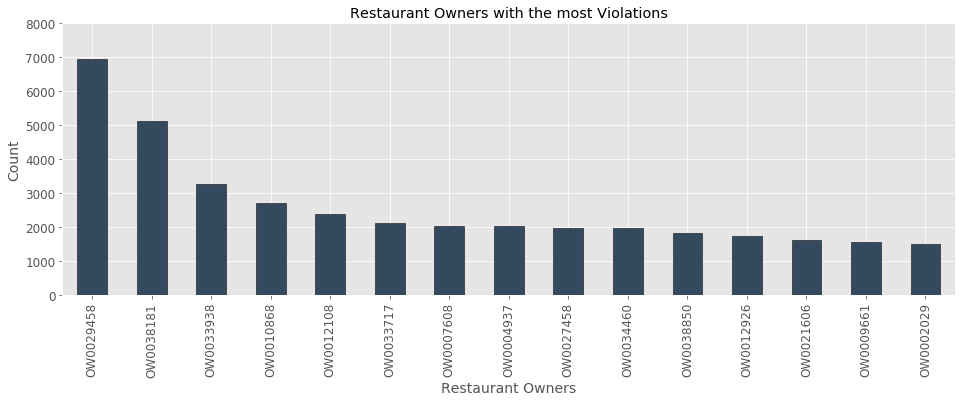

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), sharex=False)
_ = Owners[Owners['Count'] >1.5e3].plot.bar(rot=90,ax=ax, legend=False, color="#34495e", edgecolor="k")
_ = ax.set_title('Restaurant Owners with the most Violations')
_ = ax.set_ylim([0, 8e3])
_ = ax.set_xlabel('Restaurant Owners')
_ = ax.set_ylabel('Count')

In particular,

In [35]:
Owners_Violation  = Data.groupby(['Owner ID','Violation Code'])['Violation Code'].agg({'Count': 'count'})
list = Owners[Owners['Count'] == Owners['Count'].max()].index
temp = Owners_Violation.loc[list]
temp = temp.reset_index(drop=False).drop(columns ='Owner ID')
temp.T

0     1     2     3     4     5     6     7     8     9   \
Violation Code  F001  F004  F005  F006  F007  F008  F009  F011  F013  F014   
Count              7     9    17   177   299    13     5     1    20   165   

                ...    35    36    37    38    39    40    41    42    43  \
Violation Code  ...  F048  F049  F050  F052  F053  F054  F055  F058  W019   
Count           ...    31    71     7    17    92     3    27     9     1   

                  44  
Violation Code  W020  
Count              1  

[2 rows x 45 columns]

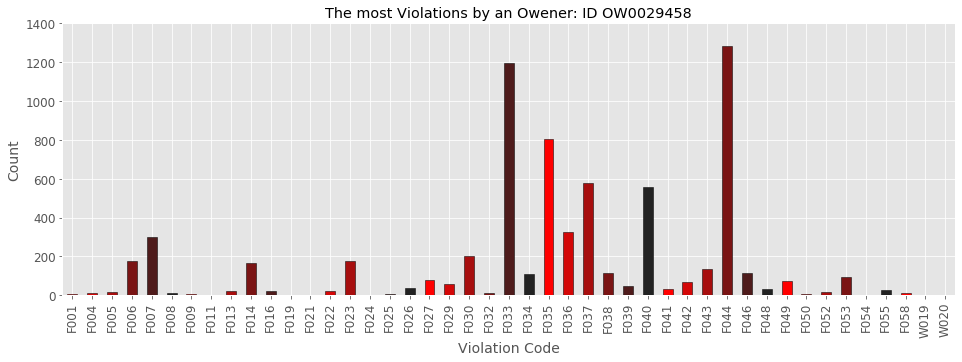

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), sharex=False)
_ = temp.plot.bar(rot=90,ax=ax, x='Violation Code', y='Count', legend=False,
                  color=sns.dark_palette("red", reverse=True), edgecolor="k")
_ = ax.set_title('The most Violations by an Owener: ID %s' % list.tolist()[0])
_ = ax.set_ylim([0, 1.4e3])
_ = ax.set_xlabel('Violation Code')
_ = ax.set_ylabel('Count')

The most violations by this owner are:

In [38]:
mylist=temp.sort_values('Count', ascending=False).head(3)['Violation Code'].tolist()
Violation_Dictionary_df.loc[Violation_Dictionary_df['Violation Code'].isin(mylist)].style.hide_index()

## Facilities with the Most Violations

In [39]:
Facilities = Data[Data['Facility Name'].isna()==False].groupby('Facility Name')['Violation Code'].agg({'Count': 'count'})
Facilities = Facilities.sort_values(by='Count', ascending=False)
Facilities[Facilities['Count'] >6e2].T

Facility Name  SUBWAY  DODGER STADIUM  DOMINO'S PIZZA  WABA GRILL  EL SUPER  \
Count            1737            1626            1492        1436      1405   

Facility Name  EL POLLO LOCO  JERSEY MIKE'S SUBS  WHOLE FOODS MARKET  \
Count                   1385                1276                1214   

Facility Name  THE COFFEE BEAN & TEA LEAF  7-ELEVEN  ...  \
Count                                1110      1006  ...   

Facility Name  STAPLES CENTER (LEVY)  SUBWAY SANDWICHES  HONG KONG EXPRESS  \
Count                            859                811                802   

Facility Name  KENTUCKY FRIED CHICKEN  SPROUTS FARMERS MARKET  \
Count                             777                     759   

Facility Name  ONO HAWAIIAN BBQ  YOGURTLAND  WINGSTOP  BASKIN ROBBINS  \
Count                       750         675       650             626   

Facility Name  WETZEL'S PRETZELS  
Count                        619  

[1 rows x 23 columns]

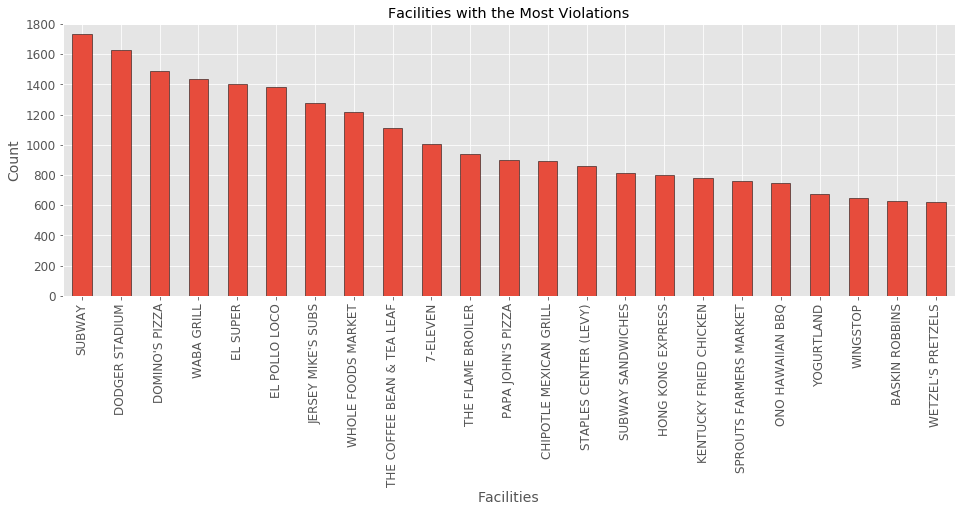

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), sharex=False)
_ = Facilities[Facilities['Count'] >6e2].plot.bar(rot=90,ax=ax, legend=False,
                                              color='#e74c3c', edgecolor='k')
_ = ax.set_title('Facilities with the Most Violations')
_ = ax.set_ylim([0, 1.8e3])
_ = ax.set_xlabel('Facilities')
_ = ax.set_ylabel('Count')

We can see that Subway and Dodger Stadium had the most violations among all.

In [41]:
Facilities_Violation  = Data.groupby(['Facility Name','Violation Code'])['Violation Code'].agg({'Count': 'count'})

list = Facilities[Facilities['Count'] == Facilities['Count'].max()].index
temp = Facilities_Violation.loc[list]
temp = temp.reset_index(drop=False).drop(columns ='Facility Name')
temp.T

0     1     2     3     4     5     6     7     8     9   \
Violation Code  F001  F004  F005  F006  F007  F009  F011  F013  F014  F022   
Count              1    12    14    50   154     6     3     2   107     4   

                ...    28    29    30    31    32    33    34    35    36  \
Violation Code  ...  F043  F044  F046  F048  F049  F050  F052  F053  F054   
Count           ...    76   216    80    22    23     4    62    27     4   

                  37  
Violation Code  F055  
Count             12  

[2 rows x 38 columns]

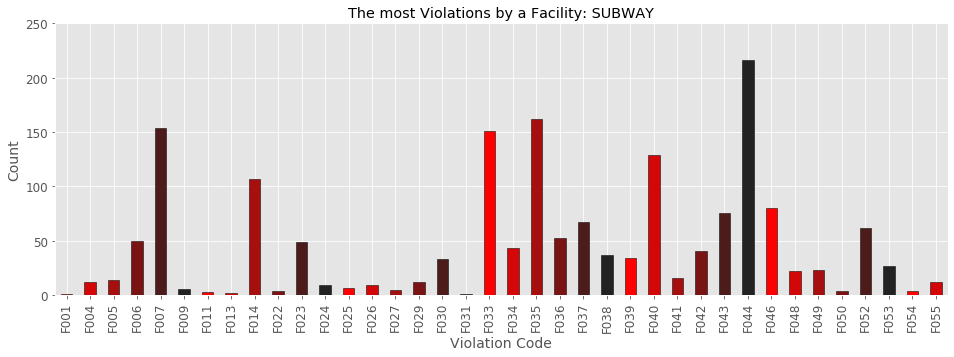

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), sharex=False)
_ = temp.plot.bar(rot=90,ax=ax, x='Violation Code', y='Count', legend=False,
                  color=sns.dark_palette("red", reverse=True), edgecolor="k")
_ = ax.set_title('The most Violations by a Facility: %s' % list.tolist()[0])
_ = ax.set_ylim([0, 250])
_ = ax.set_xlabel('Violation Code')
_ = ax.set_ylabel('Count')

The most violations by this facility are:

In [43]:
mylist=temp.sort_values('Count', ascending=False).head(3)['Violation Code'].tolist()
Violation_Dictionary_df.loc[Violation_Dictionary_df['Violation Code'].isin(mylist)].style.hide_index()

## Programs with the Most Violations

In [44]:
Programs=Data[Data['Program Name'].isna()==False].groupby('Program Name')['Violation Code'].agg({'Count': 'count'})
Programs=Programs.sort_values(by='Count', ascending=False)
Programs[Programs['Count'] >8e2].T

Program Name  SUBWAY  WABA GRILL  EL POLLO LOCO  DOMINO'S PIZZA  \
Count           1852        1471           1424            1373   

Program Name  JERSEY MIKE'S SUBS  JACK IN THE BOX  7-ELEVEN  \
Count                       1172             1156      1019   

Program Name  THE FLAME BROILER  MCDONALD'S  PAPA JOHN'S PIZZA  \
Count                      1018        1011                911   

Program Name  THE COFFEE BEAN & TEA LEAF  CHIPOTLE MEXICAN GRILL  \
Count                                905                     817   

Program Name  SUBWAY SANDWICHES  HONG KONG EXPRESS  
Count                       813                802

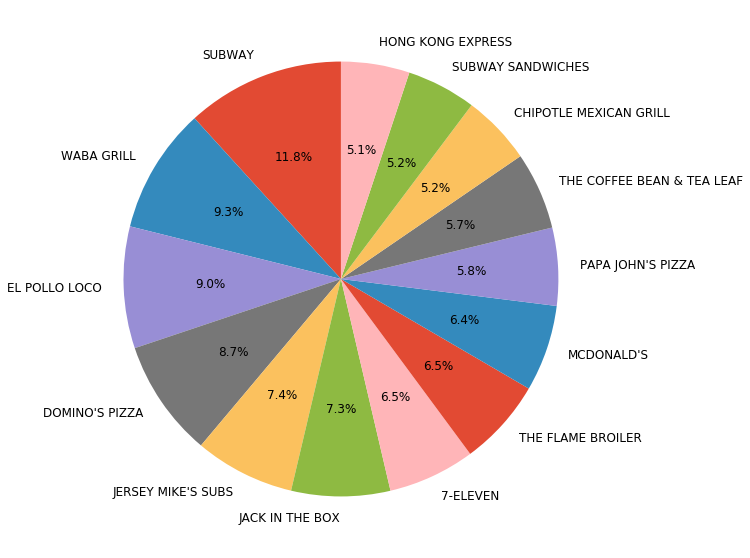

In [45]:
_ = Programs[Programs['Count'] >8e2].plot.pie(y='Count', startangle=90,  label='', legend=False, figsize=(10, 10),
                                              autopct='%1.1f%%', fontsize=12)

In [46]:
Programs_Violation  = Data.groupby(['Program Name','Violation Code'])['Violation Code'].agg({'Count': 'count'})

list = Programs[Programs['Count'] == Programs['Count'].max()].index
temp = Programs_Violation.loc[list]
temp = temp.reset_index(drop=False).drop(columns ='Program Name')
temp.T

0     1     2     3     4     5     6     7     8     9   \
Violation Code  F001  F004  F005  F006  F007  F009  F011  F013  F014  F022   
Count              1    12    14    50   165     8     4     2   112     5   

                ...    28    29    30    31    32    33    34    35    36  \
Violation Code  ...  F043  F044  F046  F048  F049  F050  F052  F053  F054   
Count           ...    83   232    84    23    26     4    68    26     4   

                  37  
Violation Code  F055  
Count             12  

[2 rows x 38 columns]

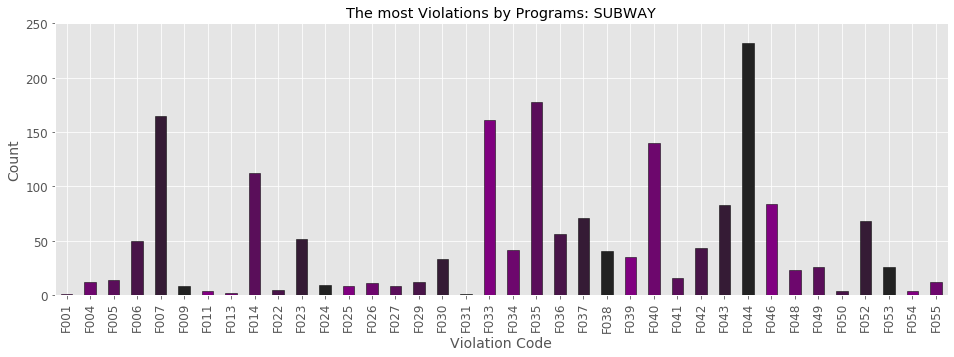

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), sharex=False)
_ = temp.plot.bar(rot=90,ax=ax, x='Violation Code', y='Count', legend=False,
                  color=sns.dark_palette("purple", reverse=True), edgecolor="k")
_ = ax.set_title('The most Violations by Programs: %s' % list.tolist()[0])
_ = ax.set_ylim([0, 2.5e2])
_ = ax.set_xlabel('Violation Code')
_ = ax.set_ylabel('Count')

In [48]:
mylist=temp.sort_values('Count', ascending=False).head(3)['Violation Code'].tolist()
Violation_Dictionary_df.loc[Violation_Dictionary_df['Violation Code'].isin(mylist)].style.hide_index()

## Cities with the Most Violations

In [49]:
Facility_Cities=Data[Data['Facility City'].isna()==False].groupby('Facility City')['Violation Code'].agg({'Count': 'count'})
Facility_Cities=Facility_Cities.sort_values(by='Count', ascending=False)
list = Facility_Cities.index.tolist()
Facility_Cities.index = list
Facility_Cities[Facility_Cities['Count'] >3e3].T

LOS ANGELES  TORRANCE  GLENDALE  NORTH HOLLYWOOD  SANTA MONICA  \
Count       271124     23594     21344            15812         15627   

       VAN NUYS  GARDENA  BURBANK  WHITTIER  INGLEWOOD  ...  GRANADA HILLS  \
Count     14392    14013    13554     12947      12392  ...           3860   

       CHATSWORTH  DIAMOND BAR  SOUTH EL MONTE  BELL GARDENS  WALNUT  \
Count        3835         3754            3653          3399    3315   

       NORTH HILLS  LAWNDALE  SAN DIMAS  LOMITA  
Count         3222      3139       3131    3086  

[1 rows x 80 columns]

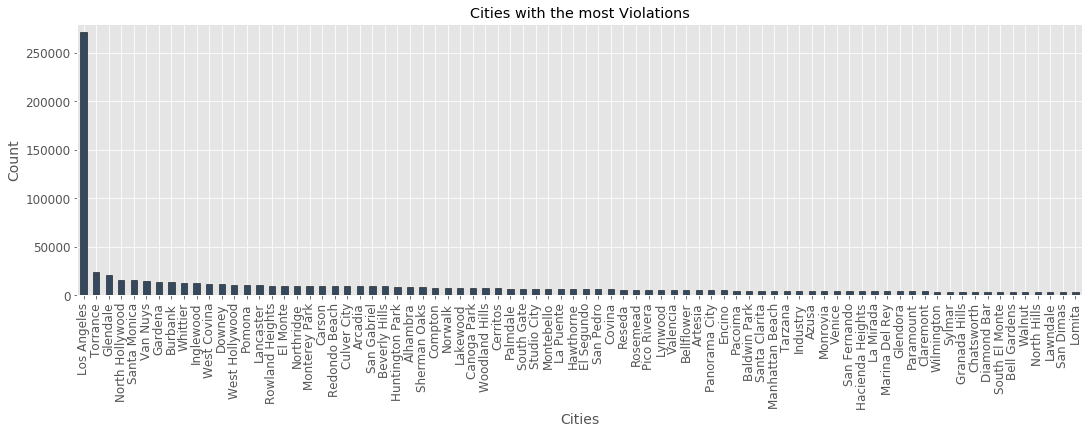

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 5), sharex=False)
_ = Facility_Cities[Facility_Cities['Count'] >3e3].plot.bar(ax=ax, legend=False, color='#34495e', edgecolor='k')
_ = ax.set_title('Cities with the most Violations')
_ = ax.set_ylim([0, 2.8e5])
_ = ax.set_xlabel('Cities')
_ = ax.set_ylabel('Count')
_ = ax.set_xticklabels(labels = [x.title() for x in list],rotation=90)

In [51]:
Facility_Cities_Violation  = Data.groupby(['Facility City','Violation Code'])['Violation Code'].agg({'Count': 'count'})

list = Facility_Cities[Facility_Cities['Count'] == Facility_Cities['Count'].max()].index
temp = Facility_Cities_Violation.loc[list]
temp = temp.reset_index(drop=False).drop(columns ='Facility City').set_index(['Violation Code'])
temp.T

Violation Code  F001  F002  F003  F004  F005   F006   F007  F008  F009  F010  \
Count            448     5     3   892  1202  10986  10310  1443  1957     3   

Violation Code  ...  W019  W021  W023  W026  W032  W034  W041  W044  W051  \
Count           ...     1     2     2     1     1     1     1     2     2   

Violation Code  W052  
Count              4  

[1 rows x 79 columns]

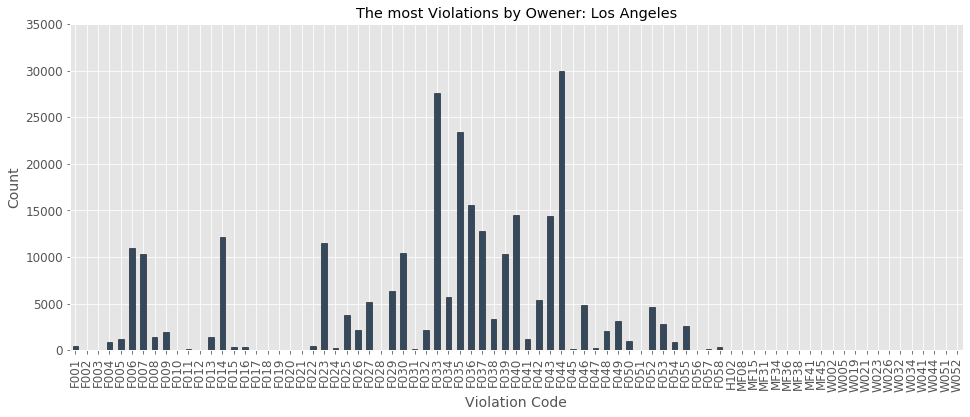

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 6), sharex=False)
_ = temp.plot.bar(rot=90,ax=ax, legend=False, color='#34495e', edgecolor='k')
_ = ax.set_title('The most Violations by Owener: %s' % list.tolist()[0].title())
_ = ax.set_ylim([0, 3.5e4])
_ = ax.set_xlabel('Violation Code')
_ = ax.set_ylabel('Count')

The most violations by this city are:

In [53]:
mylist=temp.sort_values('Count', ascending=False).head(3).index.tolist()
Violation_Dictionary_df.loc[Violation_Dictionary_df['Violation Code'].isin(mylist)].style.hide_index()

## Service Description

In [54]:
Service_Description = Data[Data['Service Description'].isna()==False].groupby('Service Description')['Violation Code'].agg({'Count': 'count'})
Service_Description.index = [x.title() for x in Service_Description.index.tolist()]
Service_Description

Count
Owner Initiated Routine Inspect.   16236
Routine Inspection                922302

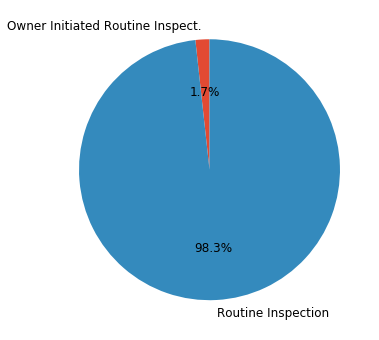

In [55]:
_ = Service_Description.plot.pie(y='Count', startangle=90,  label='', legend=False,
                                 figsize=(6,6), autopct='%1.1f%%', fontsize=12)

In [56]:
Service_Description_Violation  = Data.groupby(['Service Description','Violation Code'])['Violation Code'].agg({'Count': 'count'})
list = Service_Description[Service_Description['Count'] == Service_Description['Count'].max()].index
temp = Service_Description_Violation.loc[list[0].upper()]
temp.T

Violation Code  F001  F002  F003  F004  F005   F006   F007  F008  F009  F010  \
Count            829    34    30  3375  4550  34651  41354  5329  7244     8   

Violation Code  ...  W033  W034  W035  W040  W041  W044  W048  W050  W051  \
Count           ...     1     2     1     1     1     2     1     2    11   

Violation Code  W052  
Count              7  

[1 rows x 99 columns]

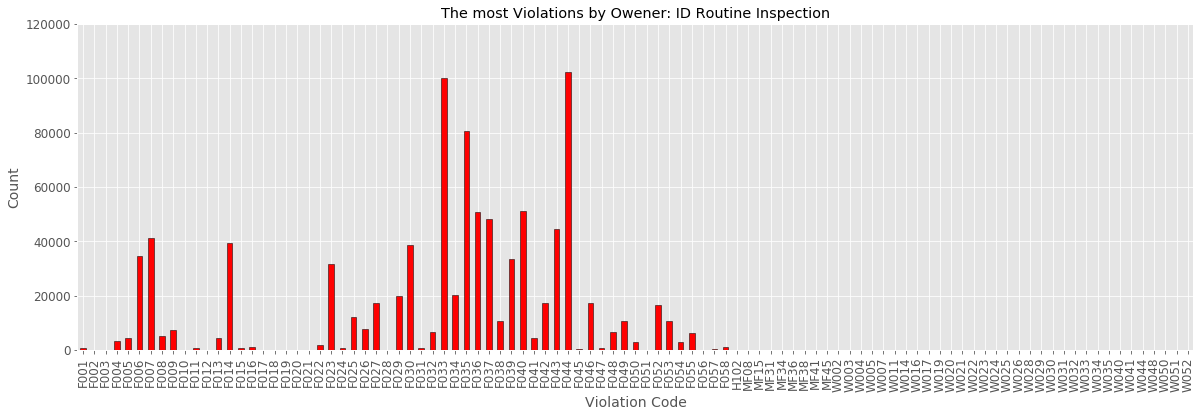

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 6), sharex=False)
_ = temp.plot.bar(rot=90,ax=ax, legend=False, color=sns.dark_palette("red", reverse=True), edgecolor="k")
_ = ax.set_title('The most Violations by Owener: ID %s' % list.tolist()[0])
_ = ax.set_ylim([0, 1.2e5])
_ = ax.set_xlabel('Violation Code')
_ = ax.set_ylabel('Count')

In [59]:
mylist=temp.sort_values('Count', ascending=False).head(3).index.tolist()
Violation_Dictionary_df.loc[Violation_Dictionary_df['Violation Code'].isin(mylist)].style.hide_index()

## The Number of Violations by High-Score and Low-Score Facilities

In [60]:
Score  = Data.groupby(['Score','Facility Name'])['Violation Code'].agg({'Count': 'count'})
Score = Score.reset_index()
Score.head(10).style.hide_index()

In [61]:
Score.tail().style.hide_index()

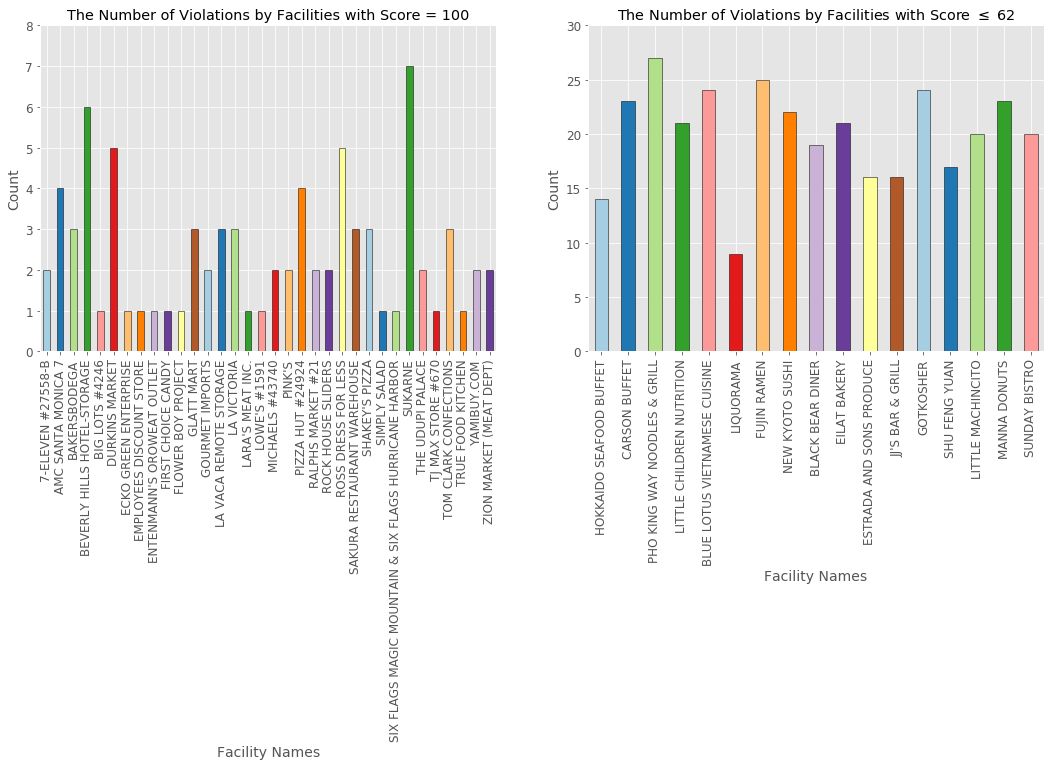

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), sharex=False)
# Left Plot
_ = Score[Score['Score'] == Score['Score'].max()].plot.bar(x='Facility Name', y='Count', rot=90, legend=False,ax=ax[0],
                                                           color=sns.color_palette("Paired"), edgecolor="k")
_ = ax[0].set_title('The Number of Violations by Facilities with Score = %i' % Score['Score'].max())
_ = ax[0].set_ylim([0, 8])
_ = ax[0].set_xlabel('Facility Names')
_ = ax[0].set_ylabel('Count')

_ = Score[Score['Score'] <= Score['Score'].min()+10].plot.bar(x='Facility Name', y='Count', rot=90, legend=False,ax=ax[1],
                                                           color=sns.color_palette("Paired"), edgecolor="k")
_ = ax[1].set_title('The Number of Violations by Facilities with Score $\leq$ %i' % (Score['Score'].min()+10))
_ = ax[1].set_ylim([0, 30])
_ = ax[1].set_xlabel('Facility Names')
_ = ax[1].set_ylabel('Count')

## The Number of Violations by Each Grades

In [63]:
Grade  = Data.groupby(['Grade'])['Violation Code'].agg({'Count': 'count'})
Grade = Grade.reset_index()
Grade.head().style.hide_index()

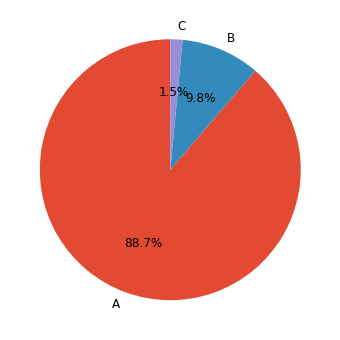

In [64]:
_ = Grade.plot.pie(x='Grade', y='Count', labels=Grade.Grade, startangle=90, legend=False, label='',
                   figsize=(6,6), autopct='%1.1f%%', fontsize=12)

## Violation Status

In [65]:
Violation_Status = Data.groupby('Violation Status')['Violation Code'].agg({'Count': 'count'})
Violation_Status.T

Violation Status  HOUSING NON-CRITICAL  OUT OF COMPLIANCE  VIOLATION
Count                                1             949671          4

## The Most Described Violations

In [66]:
Violation_Description = Data.groupby('Violation Description')['Violation Code'].agg({'Count': 'count'})
Violation_Description[Violation_Description['Count'] > 5e3] 

Count
Violation Description                                     
# 01a. Demonstration of knowledge                     7502
# 01b. Food safety certification                     17049
# 06. Adequate handwashing facilities supplied ...   35429
# 07. Proper hot and cold holding temperatures       42873
# 08. Time as a public health control; procedur...    5505
# 09. Proper cooling methods                          7579
# 14. Food contact surfaces: clean and sanitized     40494
# 21a. Hot Water Available                           11044
# 23. No rodents, insects, birds, or animals         32757
# 25. Personal cleanliness and hair restraints       12389
# 26. Approved thawing methods used, frozen foo...    8086
# 27. Food separated and protected                   17932
# 29. Toxic substances properly identified, sto...   20412
# 30. Food properly stored; food storage contai...   39656
# 32. Food properly labeled & honestly presented      6636
# 33. Nonfood-contact surfaces clean and in goo...  102729
# 34. Warewashing facilities: Adequate, maintai...   20897
# 35. Equipment/Utensils - approved; installed;...   83240
# 36. Equipment, utensils and linens: storage a...   52410
# 37. Adequate ventilation and lighting; design...   49741
# 38. Thermometers provided and accurate             11191
# 39. Wiping cloths: properly used and stored        34655
# 40. Plumbing: Plumbing in good repair, proper...   52522
# 42. Toilet facilities: properly constructed, ...   17651
# 43. Premises; personal/cleaning items; vermin...   45672
# 44. Floors, walls and ceilings: properly buil...  105171
# 46. Signs posted; last inspection report avai...   17575
# 47. Permits Available                               6726
# 50. Impoundment of unsanitary equipment or food    11119

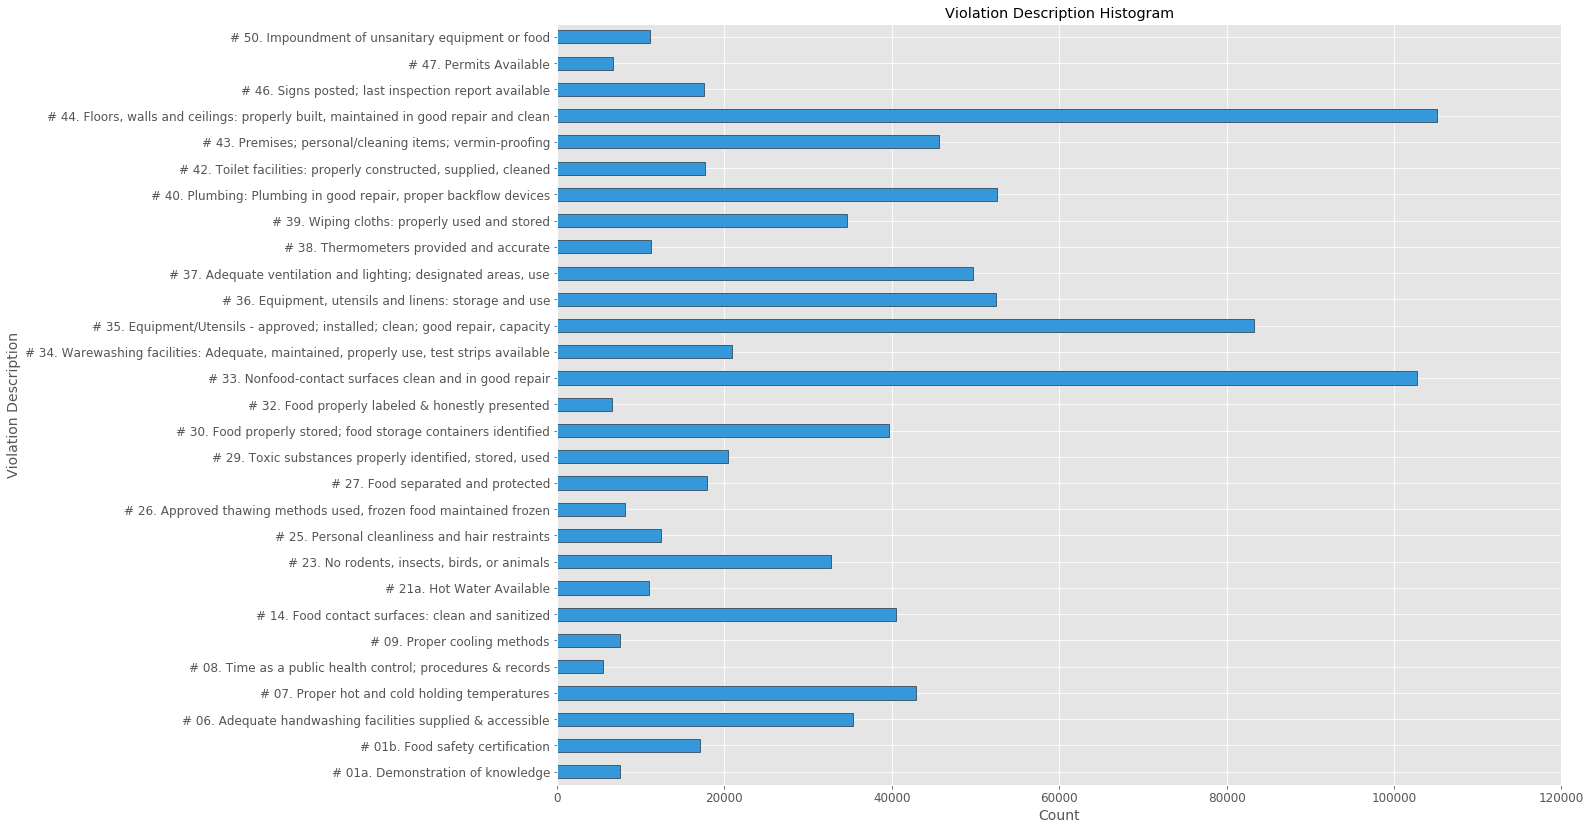

In [67]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 14), sharex=False)
_ = Violation_Description[Violation_Description['Count'] > 5e3].plot.barh(rot=0, legend=False,
                                                                         ax=ax, color='#3498db', edgecolor='k')
_ = ax.set_title('Violation Description Histogram')
_ = ax.set_xlim([0, 1.2e5])
_ = ax.set_xlabel('Count')
_ = ax.set_ylabel('Violation Description')

## Program Element Description

In [68]:
PE_Description_Type = Data.groupby('PE_Type')['Violation Code'].agg({'Count': 'count'})
PE_Description_Type.T

PE_Type  Caterer  Food Market Retail  Food Market Wholesale  \
Count        165              141620                      3   

PE_Type  Food Processing Wholesale  Food Vehicle Commissary  Food Warehouse  \
Count                           56                        5               7   

PE_Type  Interim Housing FF  LIC HTH Care Food FAC  Private School Cafeteria  \
Count                   305                    202                        37   

PE_Type  Restaurant  Swap Meet Prepackaged Food Stand  
Count        796137                                 1

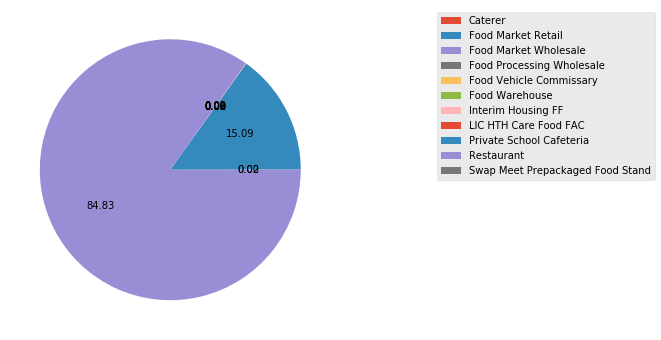

In [69]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
_ = patches, text, _ = ax.pie(PE_Description_Type['Count'].values, autopct='%.2f')
_ = ax.legend(patches, labels=PE_Description_Type.index, bbox_to_anchor=(2, 1))

In [70]:
PE_Description_Risk = Data.groupby('PE_Risk')['Violation Code'].agg({'Count': 'count'})
PE_Description_Risk.T

PE_Risk  High Risk  Low Risk  Moderate Risk
Count       646623    101194         190142

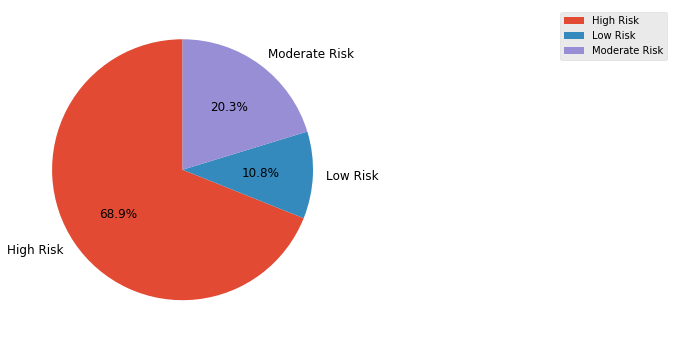

In [71]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), sharex=False)
_ = PE_Description_Risk.plot.pie(y='Count', startangle=90, legend=False,
                                 label='',ax=ax, autopct='%1.1f%%', fontsize=12)
_ = ax.legend(bbox_to_anchor=(2, 1))

In [72]:
PE_Description_Seats = Data.groupby('PE_Seats')['Violation Code'].agg({'Count': 'count'})
PE_Description_Seats.T

PE_Seats  0-10 SQ. FT.  0-1999 SQ. FT.  0-30 SQ. FT.  0-999 SQ. FT.  \
Count                5               3        364528             64   

PE_Seats  1-1999 SQ. FT.  1-4999 SQ. FT.  1000-1999 SQ. FT.  10000+ SQ. FT.  \
Count              98793               7                101              19   

PE_Seats  151+ SQ. FT.  2000+ SQ. FT.  2000-3999 SQ. FT.  2000-4999 SQ. FT.  \
Count            59795          43059                 15                 85   

PE_Seats  2000-5999 SQ. FT.  31-60 SQ. FT.  4000-9999 SQ. FT.  6000+ SQ. FT.  \
Count                    33         207980                165             11   

PE_Seats  Other  
Count     11179

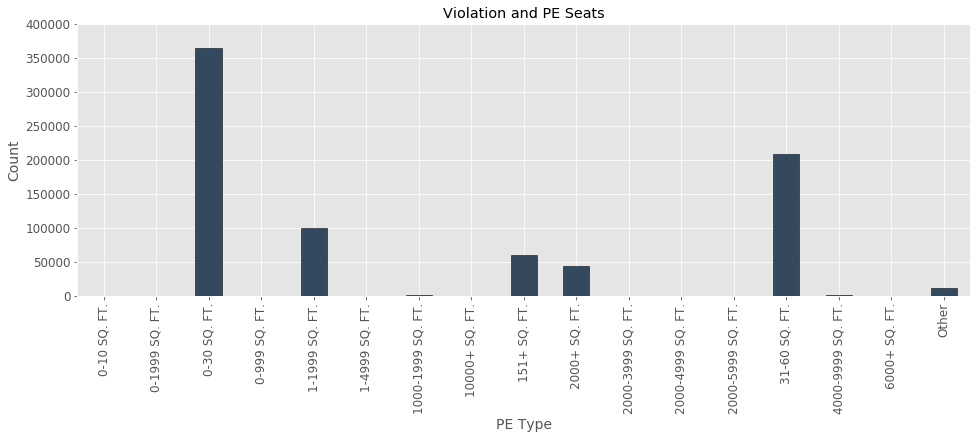

In [73]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), sharex=False)
_ = PE_Description_Seats.plot.bar(rot=90, legend=False,ax=ax, color="#34495e", edgecolor="k")
_ = ax.set_title('Violation and PE Seats')
_ = ax.set_ylim([0, 4e5])
_ = ax.set_xlabel('PE Type')
_ = ax.set_ylabel('Count')

## A Deeper look into Violation by each Facility

We can create a new data frame that represents all the different violations and the total number of each violation.

In [74]:
Violations_by_Facility  = Data.groupby(['Facility ID','Violation Code'])['Violation Code'].agg({'Count': 'count'})
Violations_by_Facility 

Count
Facility ID Violation Code       
FA0000968   F022                1
            F023                1
            F029                2
            F033                1
            F035                3
...                           ...
FA0276468   F035                1
            F036                1
FA0276477   F006                1
            F035                1
            F044                1

[480256 rows x 1 columns]

Furthermore, we can create a matrix for violations.

In [75]:
Violations_matrix = Violations_by_Facility['Count'].unstack(0).T
Violations_matrix.fillna(0, inplace=True)
Violations_matrix.reset_index(inplace=True)
Violations_matrix.iloc[:,1:] = Violations_matrix.iloc[:,1:].astype('int32')
Violations_matrix.head()

Violation Code Facility ID  F001  F002  F003  F004  F005  F006  F007  F008  \
0                FA0000968     0     0     0     0     0     0     0     0   
1                FA0000989     0     0     0     0     0     1     0     0   
2                FA0000999     0     0     0     0     0     1     0     0   
3                FA0001114     0     0     0     0     0     0     1     0   
4                FA0001155     0     0     0     0     0     1     0     0   

Violation Code  F009  ...  W033  W034  W035  W040  W041  W044  W048  W050  \
0                  0  ...     0     0     0     0     0     0     0     0   
1                  0  ...     0     0     0     0     0     0     0     0   
2                  0  ...     0     0     0     0     0     0     0     0   
3                  0  ...     0     0     0     0     0     0     0     0   
4                  0  ...     0     0     0     0     0     0     0     0   

Violation Code  W051  W052  
0                  0     0  
1                  0     0  
2                  0     0  
3                  0     0  
4                  0     0  

[5 rows x 100 columns]

#### Saving

In [76]:
Violations_matrix.to_csv('Data/Violations_matrix_df.csv',index=False)

Now, we would like to know which one of these violation codes are the most correlated ones.

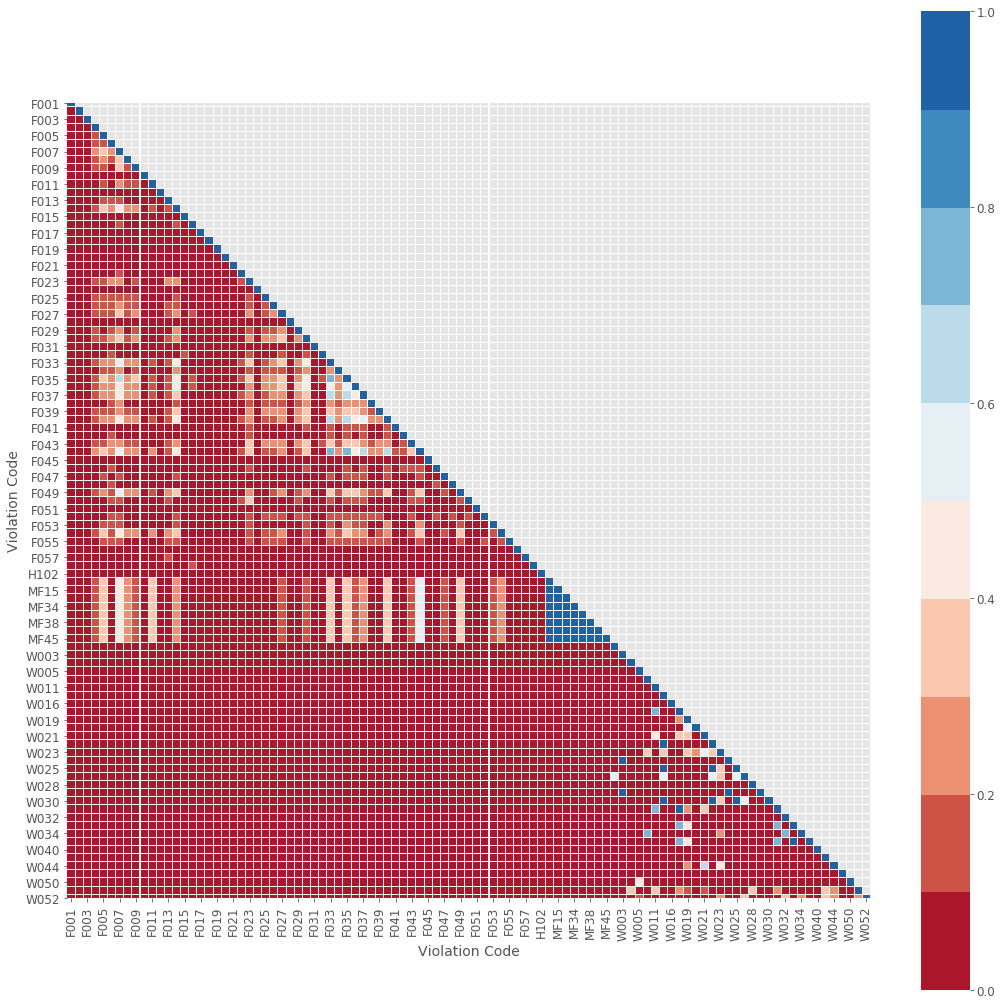

In [77]:
Correlation_Matrix = Violations_matrix.corr()
mask = np.zeros_like(Correlation_Matrix)
mask[np.triu_indices_from(mask)] = True
for i in range(len(mask)):
    mask[i,i]=0
plt.subplots(figsize=(18, 18))
_ = sns.heatmap(Correlation_Matrix, mask=mask, square=True, 
                cmap =sns.color_palette("RdBu", n_colors=10), linewidths = 0.01, vmin=0, vmax=1)

Let's consider those with a correlation of at least 0.6.

In [78]:
threshold = 0.6
Correlation_Matrix = Violations_matrix.corr()
mylist=Correlation_Matrix.index.tolist()
new_list=[]
for i in mylist:
    for j in mylist:
        if (Correlation_Matrix.loc[[i],[j]].values[0,0]>=threshold) & (Correlation_Matrix.loc[[i],[j]].values[0,0]!=1):
            new_list.append(i)
            new_list.append(j)

In [79]:
del list
mylist=list(set(new_list))

Therefore,

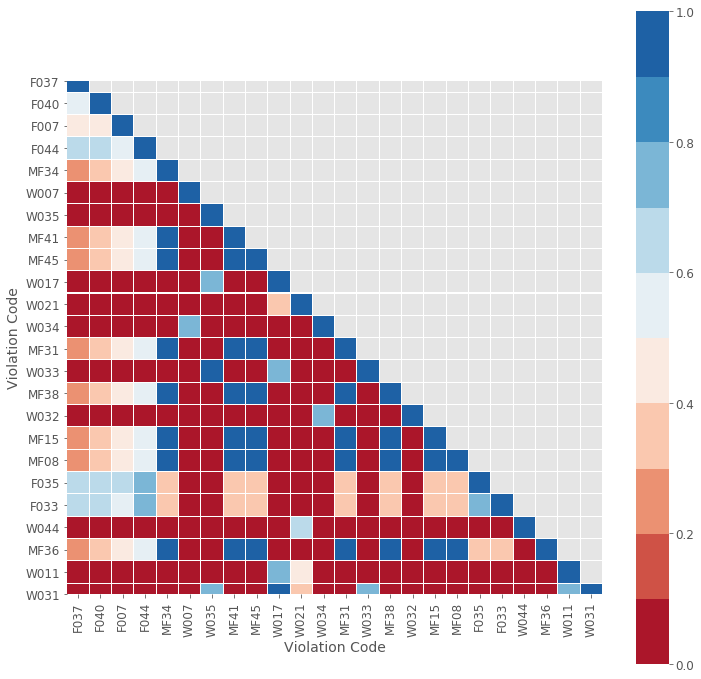

In [80]:
Correlation_Matrix = Violations_matrix[mylist].corr()
mask = np.zeros_like(Correlation_Matrix)
mask[np.triu_indices_from(mask)] = True
for i in range(len(mask)):
    mask[i,i]=0
plt.subplots(figsize=(12, 12))
_ = sns.heatmap(Correlation_Matrix, mask=mask, square=True, cmap =sns.color_palette("RdBu", n_colors=10),
                linewidths = 0.01, vmin=0, vmax=1)

The most correlated codes are:

In [81]:
print(mylist)

['F037', 'F040', 'F007', 'F044', 'MF34', 'W007', 'W035', 'MF41', 'MF45', 'W017', 'W021', 'W034', 'MF31', 'W033', 'MF38', 'W032', 'MF15', 'MF08', 'F035', 'F033', 'W044', 'MF36', 'W011', 'W031']


***